<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librerías" data-toc-modified-id="Librerías-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librerías</a></span></li><li><span><a href="#Cargar-datos" data-toc-modified-id="Cargar-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cargar datos</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Valores-nulos" data-toc-modified-id="Valores-nulos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Valores nulos</a></span></li><li><span><a href="#Equipos" data-toc-modified-id="Equipos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Equipos</a></span></li><li><span><a href="#Edad-media" data-toc-modified-id="Edad-media-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Edad media</a></span></li><li><span><a href="#Modificando-el-dataset" data-toc-modified-id="Modificando-el-dataset-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modificando el dataset</a></span></li><li><span><a href="#OneHotEncoding" data-toc-modified-id="OneHotEncoding-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>OneHotEncoding</a></span></li></ul></div>

## Librerías

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

## Cargar datos

In [5]:
df = pd.read_csv('./data/nba.csv')

In [10]:
display(df)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


## Data exploration

In [11]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [12]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


## Valores nulos

In [17]:
df.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [23]:
df = df.dropna(axis=0, how='all')

In [21]:
df.dropna(axis=0, how='all', inplace=True)

In [22]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


## Equipos

In [24]:
set(df['Team'])

{'Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Orleans Pelicans',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Toronto Raptors',
 'Utah Jazz',
 'Washington Wizards'}

In [25]:
df['Team'].unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [26]:
df['Team'].value_counts()

New Orleans Pelicans      19
Memphis Grizzlies         18
New York Knicks           16
Milwaukee Bucks           16
Boston Celtics            15
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Dallas Mavericks          15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Utah Jazz                 15
Orlando Magic             14
Minnesota Timberwolves    14
Name: Team, dtype: int64

## Edad media

In [27]:
df['Age'].mean()

26.938730853391686

In [31]:
%%time 
df.groupby('Team')['Age'].mean()

CPU times: user 2.31 ms, sys: 0 ns, total: 2.31 ms
Wall time: 1.78 ms


Team
Atlanta Hawks             28.200000
Boston Celtics            24.733333
Brooklyn Nets             25.600000
Charlotte Hornets         26.133333
Chicago Bulls             27.400000
Cleveland Cavaliers       29.533333
Dallas Mavericks          29.733333
Denver Nuggets            25.733333
Detroit Pistons           26.200000
Golden State Warriors     27.666667
Houston Rockets           26.866667
Indiana Pacers            26.400000
Los Angeles Clippers      29.466667
Los Angeles Lakers        27.533333
Memphis Grizzlies         28.388889
Miami Heat                28.933333
Milwaukee Bucks           24.562500
Minnesota Timberwolves    26.357143
New Orleans Pelicans      26.894737
New York Knicks           27.000000
Oklahoma City Thunder     27.066667
Orlando Magic             25.071429
Philadelphia 76ers        24.600000
Phoenix Suns              25.866667
Portland Trail Blazers    25.066667
Sacramento Kings          26.800000
San Antonio Spurs         31.600000
Toronto Raptors        

In [33]:
df.groupby('Team')['Age'].mean().nsmallest(1)

Team
Utah Jazz    24.466667
Name: Age, dtype: float64

In [35]:
df.groupby('Team')['Age'].mean().nlargest(1)

Team
San Antonio Spurs    31.6
Name: Age, dtype: float64

In [38]:
df.groupby('Team')['Age'].mean().sort_values(ascending=True).head(1)

Team
Utah Jazz    24.466667
Name: Age, dtype: float64

In [43]:
df.nlargest(1,'Weight')['Team']

405    Minnesota Timberwolves
Name: Team, dtype: object

In [44]:
df.nlargest(1,'Age')['Team']

298    San Antonio Spurs
Name: Team, dtype: object

In [47]:
df.nlargest(3,'Salary')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
109,Kobe Bryant,Los Angeles Lakers,24.0,SF,37.0,6-6,212.0,NaN,25000000.0
169,LeBron James,Cleveland Cavaliers,23.0,SF,31.0,6-8,250.0,NaN,22970500.0
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000.0


In [51]:
df.groupby('Team')['Age'].agg(np.mean)

Team
Atlanta Hawks             28.200000
Boston Celtics            24.733333
Brooklyn Nets             25.600000
Charlotte Hornets         26.133333
Chicago Bulls             27.400000
Cleveland Cavaliers       29.533333
Dallas Mavericks          29.733333
Denver Nuggets            25.733333
Detroit Pistons           26.200000
Golden State Warriors     27.666667
Houston Rockets           26.866667
Indiana Pacers            26.400000
Los Angeles Clippers      29.466667
Los Angeles Lakers        27.533333
Memphis Grizzlies         28.388889
Miami Heat                28.933333
Milwaukee Bucks           24.562500
Minnesota Timberwolves    26.357143
New Orleans Pelicans      26.894737
New York Knicks           27.000000
Oklahoma City Thunder     27.066667
Orlando Magic             25.071429
Philadelphia 76ers        24.600000
Phoenix Suns              25.866667
Portland Trail Blazers    25.066667
Sacramento Kings          26.800000
San Antonio Spurs         31.600000
Toronto Raptors        

In [50]:
df.groupby('Team')['Age'].agg(lambda x: x.mean())

Team
Atlanta Hawks             28.200000
Boston Celtics            24.733333
Brooklyn Nets             25.600000
Charlotte Hornets         26.133333
Chicago Bulls             27.400000
Cleveland Cavaliers       29.533333
Dallas Mavericks          29.733333
Denver Nuggets            25.733333
Detroit Pistons           26.200000
Golden State Warriors     27.666667
Houston Rockets           26.866667
Indiana Pacers            26.400000
Los Angeles Clippers      29.466667
Los Angeles Lakers        27.533333
Memphis Grizzlies         28.388889
Miami Heat                28.933333
Milwaukee Bucks           24.562500
Minnesota Timberwolves    26.357143
New Orleans Pelicans      26.894737
New York Knicks           27.000000
Oklahoma City Thunder     27.066667
Orlando Magic             25.071429
Philadelphia 76ers        24.600000
Phoenix Suns              25.866667
Portland Trail Blazers    25.066667
Sacramento Kings          26.800000
San Antonio Spurs         31.600000
Toronto Raptors        

## Modificando el dataset

In [52]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [53]:
df['Position'].value_counts()

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

In [55]:
df['Posicion'] = df['Position'].map({'SG':'Escolta', 
                                     'SF':'Alero', 
                                     'PF':'Ala Pivot', 
                                     'PG':'Base', 
                                     'C':'Pivot'})

In [56]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Posicion
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,Base
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,Alero
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,Escolta
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,Escolta
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0,Ala Pivot
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0,Ala Pivot
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0,Base
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0,Base
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0,Pivot


In [60]:
df['Age'] = df['Age'].astype(int)

In [61]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Posicion
0,Avery Bradley,Boston Celtics,0.0,PG,25,6-2,180.0,Texas,7730337.0,Base
1,Jae Crowder,Boston Celtics,99.0,SF,25,6-6,235.0,Marquette,6796117.0,Alero
2,John Holland,Boston Celtics,30.0,SG,27,6-5,205.0,Boston University,NaN,Escolta
3,R.J. Hunter,Boston Celtics,28.0,SG,22,6-5,185.0,Georgia State,1148640.0,Escolta
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,6-10,231.0,NaN,5000000.0,Ala Pivot
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20,6-10,234.0,Kentucky,2239800.0,Ala Pivot
453,Shelvin Mack,Utah Jazz,8.0,PG,26,6-3,203.0,Butler,2433333.0,Base
454,Raul Neto,Utah Jazz,25.0,PG,24,6-1,179.0,NaN,900000.0,Base
455,Tibor Pleiss,Utah Jazz,21.0,C,26,7-3,256.0,NaN,2900000.0,Pivot


In [62]:
df.loc[:,'Weight'] = df['Weight'].astype(int)

In [63]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Posicion
0,Avery Bradley,Boston Celtics,0.0,PG,25,6-2,180,Texas,7730337.0,Base
1,Jae Crowder,Boston Celtics,99.0,SF,25,6-6,235,Marquette,6796117.0,Alero
2,John Holland,Boston Celtics,30.0,SG,27,6-5,205,Boston University,NaN,Escolta
3,R.J. Hunter,Boston Celtics,28.0,SG,22,6-5,185,Georgia State,1148640.0,Escolta
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,6-10,231,NaN,5000000.0,Ala Pivot
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20,6-10,234,Kentucky,2239800.0,Ala Pivot
453,Shelvin Mack,Utah Jazz,8.0,PG,26,6-3,203,Butler,2433333.0,Base
454,Raul Neto,Utah Jazz,25.0,PG,24,6-1,179,NaN,900000.0,Base
455,Tibor Pleiss,Utah Jazz,21.0,C,26,7-3,256,NaN,2900000.0,Pivot


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   Height    457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
 9   Posicion  457 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 39.3+ KB


In [70]:
float('6-2'.split('-')[0])*30.5 + float('6-2'.split('-')[1])*2.5

188.0

In [ ]:
lambda x:float(x.split('-')[0])*30.5 + float(x.split('-')[1])*2.5

In [73]:
df['Altura'] = df['Height'].apply(lambda x:float(x.split('-')[0])*30.5 + float(x.split('-')[1])*2.5)

In [74]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Posicion,Altura
0,Avery Bradley,Boston Celtics,0.0,PG,25,6-2,180,Texas,7730337.0,Base,188.0
1,Jae Crowder,Boston Celtics,99.0,SF,25,6-6,235,Marquette,6796117.0,Alero,198.0
2,John Holland,Boston Celtics,30.0,SG,27,6-5,205,Boston University,NaN,Escolta,195.5
3,R.J. Hunter,Boston Celtics,28.0,SG,22,6-5,185,Georgia State,1148640.0,Escolta,195.5
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,6-10,231,NaN,5000000.0,Ala Pivot,208.0
...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20,6-10,234,Kentucky,2239800.0,Ala Pivot,208.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26,6-3,203,Butler,2433333.0,Base,190.5
454,Raul Neto,Utah Jazz,25.0,PG,24,6-1,179,NaN,900000.0,Base,185.5
455,Tibor Pleiss,Utah Jazz,21.0,C,26,7-3,256,NaN,2900000.0,Pivot,221.0


In [76]:
df.groupby('Team')['Altura'].mean().nlargest(3)

Team
Minnesota Timberwolves    204.107143
Dallas Mavericks          202.600000
Chicago Bulls             202.366667
Name: Altura, dtype: float64

In [79]:
plt.rcParams['figure.figsize'] = (10,10)

<AxesSubplot:>

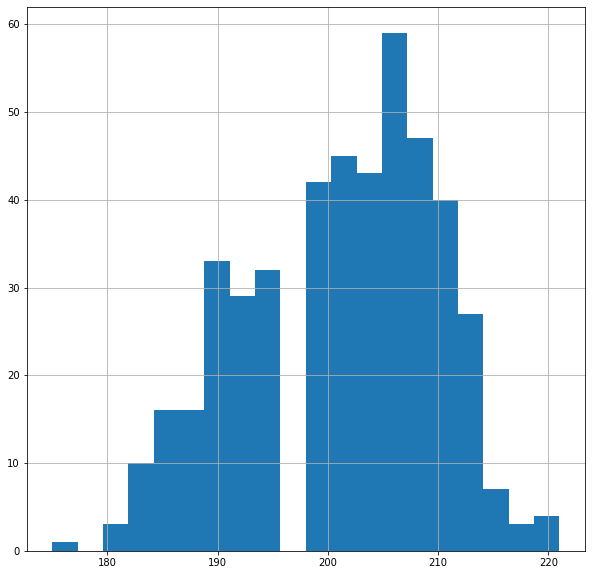

In [80]:
df['Altura'].hist(bins=20)

In [88]:
help(df.hist)

Help on method hist_frame in module pandas.plotting._core:

hist_frame(column: 'IndexLabel' = None, by=None, grid: 'bool' = True, xlabelsize: 'int | None' = None, xrot: 'float | None' = None, ylabelsize: 'int | None' = None, yrot: 'float | None' = None, ax=None, sharex: 'bool' = False, sharey: 'bool' = False, figsize: 'tuple[int, int] | None' = None, layout: 'tuple[int, int] | None' = None, bins: 'int | Sequence[int]' = 10, backend: 'str | None' = None, legend: 'bool' = False, **kwargs) method of pandas.core.frame.DataFrame instance
    Make a histogram of the DataFrame's columns.
    
    A `histogram`_ is a representation of the distribution of data.
    This function calls :meth:`matplotlib.pyplot.hist`, on each series in
    the DataFrame, resulting in one histogram per column.
    
    .. _histogram: https://en.wikipedia.org/wiki/Histogram
    
    Parameters
    ----------
    data : DataFrame
        The pandas object holding the data.
    column : str or sequence, optional
    

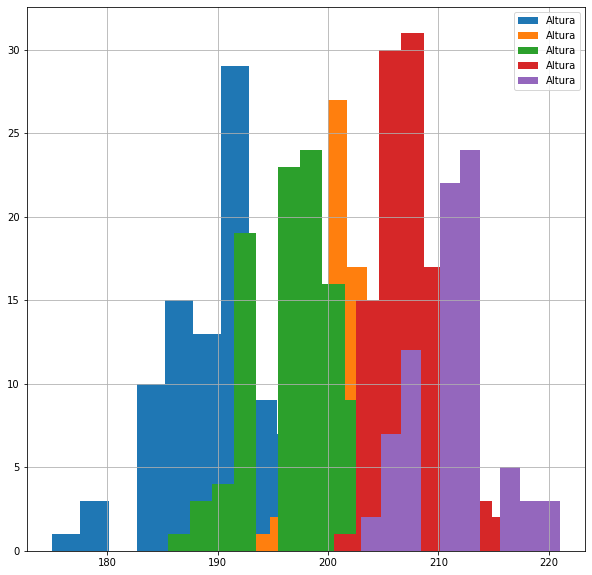

In [90]:
for pos in df['Position'].unique():
    df[df['Position'] == pos]['Altura'].hist(legend=pos)

In [81]:
import seaborn as sns

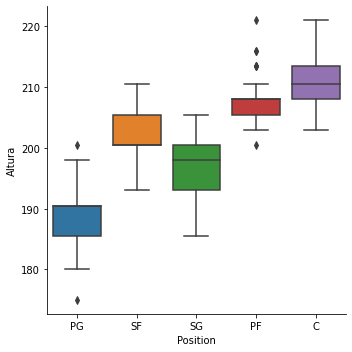

In [92]:
sns.catplot(data=df, x='Position', y='Altura', kind='box')

In [93]:
df.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
Posicion     0
Altura       0
dtype: int64

In [95]:
df['College'].fillna('Unknown', inplace=True)

In [97]:
df['Salary'].fillna(df['Salary'].median(), inplace=True)

In [128]:
df.groupby('Team', sort=False)
  .apply(lambda x: x['Salary'].fillna(x['Salary'].median))

Team               
Boston Celtics  0      7730337.0
                1      6796117.0
                2      2839073.0
                3      1148640.0
                4      5000000.0
                         ...    
Utah Jazz       452    2239800.0
                453    2433333.0
                454     900000.0
                455    2900000.0
                456     947276.0
Name: Salary, Length: 457, dtype: float64

In [99]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Posicion,Altura
0,Avery Bradley,Boston Celtics,0.0,PG,25,6-2,180,Texas,7730337.0,Base,188.0
1,Jae Crowder,Boston Celtics,99.0,SF,25,6-6,235,Marquette,6796117.0,Alero,198.0
2,John Holland,Boston Celtics,30.0,SG,27,6-5,205,Boston University,2839073.0,Escolta,195.5
3,R.J. Hunter,Boston Celtics,28.0,SG,22,6-5,185,Georgia State,1148640.0,Escolta,195.5
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,6-10,231,Unknown,5000000.0,Ala Pivot,208.0
...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20,6-10,234,Kentucky,2239800.0,Ala Pivot,208.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26,6-3,203,Butler,2433333.0,Base,190.5
454,Raul Neto,Utah Jazz,25.0,PG,24,6-1,179,Unknown,900000.0,Base,185.5
455,Tibor Pleiss,Utah Jazz,21.0,C,26,7-3,256,Unknown,2900000.0,Pivot,221.0


In [100]:
df.describe()

,Number,Age,Weight,Salary,Altura
count,457.000000,457.000000,457.000000,4.570000e+02,457.000000
mean,17.678337,26.938731,221.522976,4.794457e+06,201.016411
std,15.966090,4.404016,26.368343,5.174920e+06,8.664131
min,0.000000,19.000000,161.000000,3.088800e+04,175.000000
25%,5.000000,24.000000,200.000000,1.100602e+06,195.500000
50%,13.000000,26.000000,220.000000,2.839073e+06,203.000000
75%,25.000000,30.000000,240.000000,6.331404e+06,208.000000
max,99.000000,40.000000,307.000000,2.500000e+07,221.000000


In [105]:
df['Age'].quantile(0.10)

22.0

In [103]:
df['Age'].median()

26.0

In [110]:
df.drop('Height', axis=1, inplace=True)

In [111]:
df

,Name,Team,Number,Position,Age,Weight,College,Salary,Posicion,Altura
0,Avery Bradley,Boston Celtics,0.0,PG,25,180,Texas,7730337.0,Base,188.0
1,Jae Crowder,Boston Celtics,99.0,SF,25,235,Marquette,6796117.0,Alero,198.0
2,John Holland,Boston Celtics,30.0,SG,27,205,Boston University,2839073.0,Escolta,195.5
3,R.J. Hunter,Boston Celtics,28.0,SG,22,185,Georgia State,1148640.0,Escolta,195.5
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,231,Unknown,5000000.0,Ala Pivot,208.0
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20,234,Kentucky,2239800.0,Ala Pivot,208.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26,203,Butler,2433333.0,Base,190.5
454,Raul Neto,Utah Jazz,25.0,PG,24,179,Unknown,900000.0,Base,185.5
455,Tibor Pleiss,Utah Jazz,21.0,C,26,256,Unknown,2900000.0,Pivot,221.0


## OneHotEncoding

In [112]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
  

In [118]:
pd.get_dummies(df['Position'])

,C,PF,PG,SF,SG
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
452,0,1,0,0,0
453,0,0,1,0,0
454,0,0,1,0,0
455,1,0,0,0,0


In [116]:
df = pd.concat([df, pd.get_dummies(df['Position'])], axis=1)

In [117]:
df

,Name,Team,Number,Position,Age,Weight,College,Salary,Posicion,Altura,C,PF,PG,SF,SG
0,Avery Bradley,Boston Celtics,0.0,PG,25,180,Texas,7730337.0,Base,188.0,0,0,1,0,0
1,Jae Crowder,Boston Celtics,99.0,SF,25,235,Marquette,6796117.0,Alero,198.0,0,0,0,1,0
2,John Holland,Boston Celtics,30.0,SG,27,205,Boston University,2839073.0,Escolta,195.5,0,0,0,0,1
3,R.J. Hunter,Boston Celtics,28.0,SG,22,185,Georgia State,1148640.0,Escolta,195.5,0,0,0,0,1
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,231,Unknown,5000000.0,Ala Pivot,208.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20,234,Kentucky,2239800.0,Ala Pivot,208.0,0,1,0,0,0
453,Shelvin Mack,Utah Jazz,8.0,PG,26,203,Butler,2433333.0,Base,190.5,0,0,1,0,0
454,Raul Neto,Utah Jazz,25.0,PG,24,179,Unknown,900000.0,Base,185.5,0,0,1,0,0
455,Tibor Pleiss,Utah Jazz,21.0,C,26,256,Unknown,2900000.0,Pivot,221.0,1,0,0,0,0


In [126]:
df

,Name,Team,Number,Position,Age,Weight,College,Salary,Posicion,Altura,C,PF,PG,SF,SG
0,Avery Bradley,Boston Celtics,0.0,PG,25,180,Texas,7730337.0,Base,188.0,0,0,1,0,0
1,Jae Crowder,Boston Celtics,99.0,SF,25,235,Marquette,6796117.0,Alero,198.0,0,0,0,1,0
2,John Holland,Boston Celtics,30.0,SG,27,205,Boston University,2839073.0,Escolta,195.5,0,0,0,0,1
3,R.J. Hunter,Boston Celtics,28.0,SG,22,185,Georgia State,1148640.0,Escolta,195.5,0,0,0,0,1
4,Jonas Jerebko,Boston Celtics,8.0,PF,29,231,Unknown,5000000.0,Ala Pivot,208.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20,234,Kentucky,2239800.0,Ala Pivot,208.0,0,1,0,0,0
453,Shelvin Mack,Utah Jazz,8.0,PG,26,203,Butler,2433333.0,Base,190.5,0,0,1,0,0
454,Raul Neto,Utah Jazz,25.0,PG,24,179,Unknown,900000.0,Base,185.5,0,0,1,0,0
455,Tibor Pleiss,Utah Jazz,21.0,C,26,256,Unknown,2900000.0,Pivot,221.0,1,0,0,0,0
